<a href="https://colab.research.google.com/github/Riti13/case_study_McDonalds/blob/main/McDonalds_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/mcdonalds.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
data.shape

(1453, 15)

In [ ]:
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [ ]:
mdx = data.iloc[:, 0:11].values

# Convert "Yes" to 1 and everything else to 0
mdx = (mdx == "Yes").astype(int)

# Calculate the column means and round to 2 decimal place
col_means = np.round(mdx.mean(axis=0), 2)

print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [ ]:
from sklearn.decomposition import PCA

# Assuming you have a numpy array mdx as defined in the previous answer
# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(mdx)

# Print the summary
print("Proportion of Variance Explained:")
print(np.round(pca.explained_variance_ratio_, 2))
print("\nPrincipal Components:")
print(np.round(pca.components_, 2))


Proportion of Variance Explained:
[0.3  0.19 0.13 0.08 0.06 0.05 0.04 0.04 0.04 0.03 0.03]

Principal Components:
[[-0.48 -0.16 -0.01  0.12  0.3  -0.11 -0.34 -0.47  0.33 -0.21  0.37]
 [ 0.36  0.02  0.02 -0.03 -0.06 -0.09 -0.61  0.31  0.6   0.08 -0.14]
 [-0.3  -0.06 -0.04 -0.32 -0.8  -0.06 -0.15 -0.29  0.02  0.19 -0.09]
 [ 0.06 -0.14  0.2  -0.35  0.25 -0.1   0.12 -0.    0.07  0.76  0.37]
 [-0.31  0.28  0.07 -0.07  0.36  0.11 -0.13 -0.21 -0.    0.29 -0.73]
 [ 0.17 -0.35 -0.36 -0.41  0.21 -0.59 -0.1  -0.08 -0.26 -0.18 -0.21]
 [-0.28 -0.06  0.71 -0.39  0.04 -0.09 -0.04  0.36 -0.07 -0.35 -0.03]
 [ 0.01 -0.11  0.38  0.59 -0.14 -0.63  0.14 -0.07  0.03  0.18 -0.17]
 [ 0.57 -0.02  0.4  -0.16 -0.    0.17  0.08 -0.64  0.07 -0.19 -0.07]
 [-0.11 -0.67 -0.08 -0.01  0.01  0.24  0.43  0.08  0.45 -0.04 -0.29]
 [ 0.05 -0.54  0.14  0.25  0.    0.34 -0.49  0.02 -0.49  0.16 -0.04]]


In [ ]:
np.set_printoptions(precision=1, suppress=True)
print(MD_pca)

[[ 0.4 -0.2  0.7 ...  0.2  0.5 -0.6]
 [-0.2  0.4 -0.7 ...  0.1  0.5 -0.5]
 [ 0.4  0.7 -0.1 ... -0.3  0.1  0.2]
 ...
 [-0.2  1.1  0.2 ...  0.   0.1 -0. ]
 [-1.2 -0.   0.6 ...  0.  -0.  -0.1]
 [ 1.6  0.3 -0.  ... -0.1 -0.4 -0.5]]


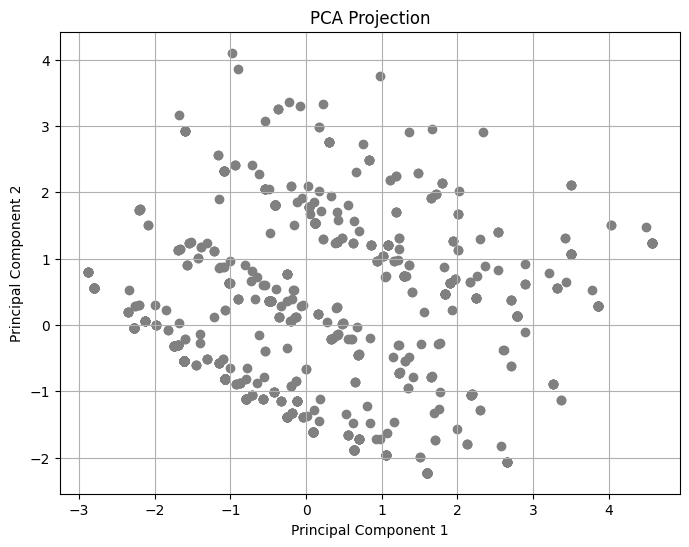

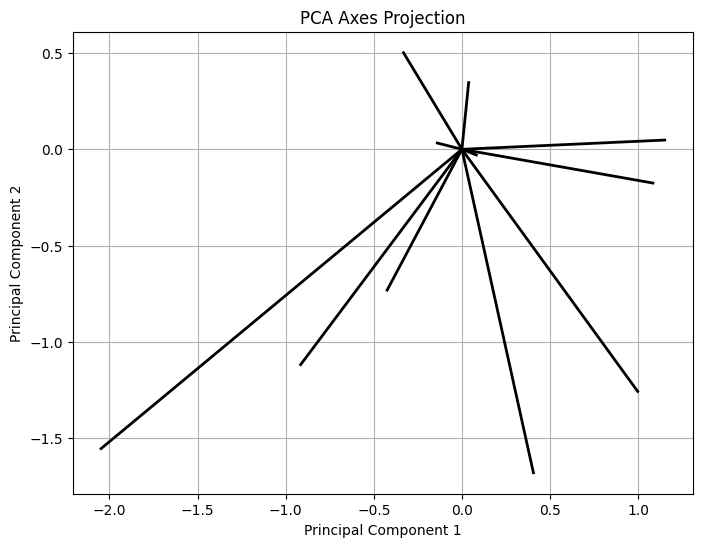

In [ ]:

from sklearn.preprocessing import StandardScaler

# Assuming you have a numpy array mdx as defined in the previous answers
# Standardize the data (optional but often recommended for PCA)
scaler = StandardScaler()
MD_x_std = scaler.fit_transform(mdx)

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x_std)

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.grid(True)

# Project Axes
plt.figure(figsize=(8, 6))
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector[:2] * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], 'k-', lw=2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Axes Projection')
plt.grid(True)

plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Set the random seed
np.random.seed(1234)

# Define the number of clusters (2 to 8 clusters)
num_clusters = range(2, 9)

# Initialize variables to store the clustering results
best_cluster_labels = None
best_cluster_centers = None
best_inertia = float("inf")

# Perform k-means clustering with different numbers of clusters
for num_cluster in num_clusters:
    kmeans = KMeans(n_clusters=num_cluster, n_init=10, random_state=1234)
    cluster_labels = kmeans.fit_predict(MD_x_std)
    cluster_centers = kmeans.cluster_centers_
    inertia = kmeans.inertia_

    if inertia < best_inertia:
        best_inertia = inertia
        best_cluster_labels = cluster_labels
        best_cluster_centers = cluster_centers

# The best clustering result is stored in best_cluster_labels
# You can relabel the clusters if needed
# For simplicity, we'll use the cluster labels as they are
MD_km28 = best_cluster_labels


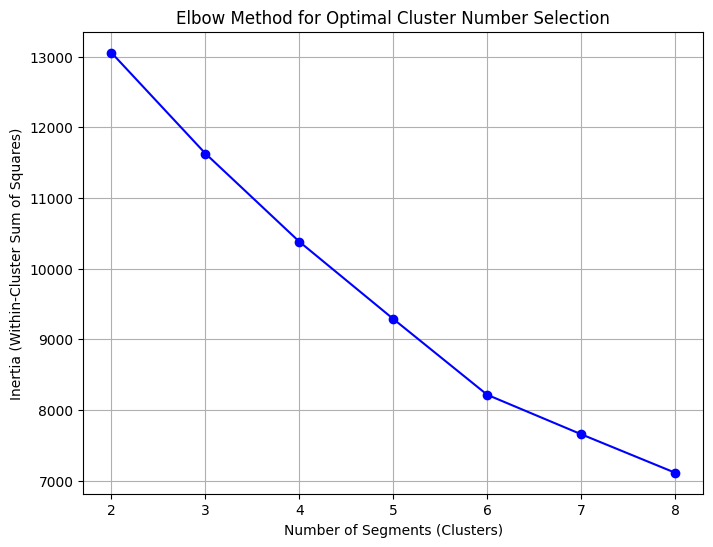

In [ ]:

# Initialize a list to store the inertia values (within-cluster sum of squares)
inertia_values = []

# Perform k-means clustering with different numbers of clusters and store inertia values
for num_cluster in num_clusters:
    kmeans = KMeans(n_clusters=num_cluster, n_init=10, random_state=1234)
    kmeans.fit(MD_x_std)
    inertia_values.append(kmeans.inertia_)

# Create a plot to visualize the inertia values vs. number of clusters
plt.figure(figsize=(8, 6))
plt.plot(num_clusters, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Cluster Number Selection')
plt.grid(True)
plt.show()


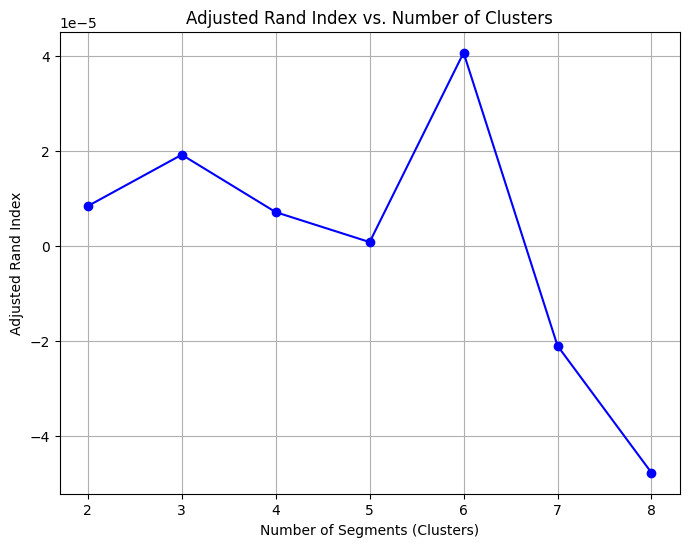

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Assuming you have a numpy array MD_x as defined in previous answers
# Set the random seed
np.random.seed(1234)

# Define the range of cluster numbers (2 to 8 clusters)
num_clusters = range(2, 9)

# Number of bootstrap iterations
nboot = 100

# Number of repetitions for each cluster number
nrep = 10

# Initialize lists to store results
adjusted_rand_indices = []

# Perform bootstrapping with k-means clustering and calculate adjusted Rand indices
for num_cluster in num_clusters:
    cluster_results = []

    for _ in range(nrep):
        rand_indices = []

        for _ in range(nboot):
            # Resample the data with replacement
            bootstrap_sample = resample(mdx, random_state=1234)

            # Perform k-means clustering on the bootstrap sample
            kmeans = KMeans(n_clusters=num_cluster, n_init=10, random_state=1234)
            cluster_labels = kmeans.fit_predict(bootstrap_sample)

            # Calculate the adjusted Rand index
            true_labels = np.random.choice(range(num_cluster), len(cluster_labels))
            rand_index = adjusted_rand_score(true_labels, cluster_labels)
            rand_indices.append(rand_index)

        cluster_results.append(np.mean(rand_indices))

    # Calculate the average adjusted Rand index for this cluster number and store it
    adjusted_rand_indices.append(np.mean(cluster_results))

# Create a plot to visualize the adjusted Rand indices vs. the number of clusters
plt.figure(figsize=(8, 6))
plt.plot(num_clusters, adjusted_rand_indices, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Adjusted Rand Index')
plt.title('Adjusted Rand Index vs. Number of Clusters')
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming MD_km28 contains the cluster labels for 4 clusters
cluster_labels = MD_km28["4"]

# Extract the data corresponding to cluster 4
cluster_data = MD_x[cluster_labels == 3]  # Adjust the cluster label as needed

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(cluster_data, bins=np.linspace(0, 1, 11), edgecolor='k', alpha=0.7)
plt.xlim(0, 1)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram for Cluster 4')
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

# Assuming MD_km28 contains the cluster labels for your data
cluster_labels = MD_km28

# Calculate the silhouette scores for each sample
silhouette_avg = silhouette_score(MD_x_std, cluster_labels)
sample_silhouette_values = silhouette_samples(MD_x_std, cluster_labels)

# Create a subplot with a single row and two columns
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

# The silhouette plot displays a horizontal bar for each sample
y_lower = 10  # Adjust this value based on your data and plot preferences

for i in range(num_clusters):
    # Aggregate the silhouette scores for samples belonging to the current cluster
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.get_cmap("Spectral")(float(i) / num_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for the next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax.set_title("Silhouette Plot for K-Means Clustering")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")

# The vertical line indicates the average silhouette score
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])  # Clear the y-axis labels

plt.show()


In [ ]:
# Assuming MD_km28 contains the cluster labels for your data
cluster_number = 4  # Specify the cluster number you want to extract

# Extract the cluster assignments for the specified cluster
cluster_assignments = np.where(cluster_labels == cluster_number)[0]

# Now, cluster_assignments contains the indices of data points belonging to cluster 4
# You can use these indices to access the data points or perform further analysis

from sklearn.metrics import silhouette_samples

# Assuming MD_k4 contains the cluster assignments for cluster 4
cluster_number = 4  # Specify the cluster number for which you want to calculate the silhouette width

# Calculate the silhouette widths for the data points in cluster 4
silhouette_widths = silhouette_samples(MD_x_std, MD_km28 == cluster_number)

# Now, silhouette_widths contains the silhouette widths for the data points in cluster 4
# You can use these values for further analysis or visualization



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some example data for segment stability (replace with your actual data)
segment_stability = np.random.rand(10)  # Replace with your segment stability values
segment_numbers = np.arange(1, 11)  # Assuming you have 10 segments

# Create a plot for segment stability
plt.figure(figsize=(8, 6))
plt.plot(segment_numbers, segment_stability, marker='o', linestyle='-', color='b')
plt.ylim(0, 1)  # Set the y-axis limits to 0 and 1
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.title('Segment Stability Plot')
plt.grid(True)
plt.show()


In [ ]:
pip install mixtools

In [ ]:
import numpy as np
import mixtools as mt
from sklearn.preprocessing import StandardScaler

# Assuming you have a numpy array MD_x as your data

# Standardize the data (recommended for model-based clustering)
scaler = StandardScaler()
MD_x_std = scaler.fit_transform(MD_x)

# Set the random seed
np.random.seed(1234)

# Define the range of cluster numbers (2 to 8 clusters)
num_clusters = range(2, 9)

# Number of repetitions for each cluster number
nrep = 10

# Initialize a list to store the model-based clustering results
cluster_results = []

# Perform model-based clustering with different numbers of clusters
for num_cluster in num_clusters:
    cluster_results_rep = []

    for _ in range(nrep):
        # Fit a mixture model with the specified number of clusters
        model = mt.MixtureModel(num_cluster, model_type="mvbinary")
        model.fit(MD_x_std)

        # Extract cluster assignments for each data point
        cluster_labels = model.predict(MD_x_std)

        cluster_results_rep.append(cluster_labels)

    # Store the clustering results for this cluster number
    cluster_results.append(cluster_results_rep)

# The cluster_results list now contains the clustering results for different cluster numbers and repetitions
# You can access and analyze the results as needed


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming MD.k4 contains the cluster assignments from k-means clustering
# and MD.m4 contains the cluster assignments from model-based clustering

# Create a DataFrame with the cluster assignments
df = pd.DataFrame({'kmeans': MD_k4, 'mixture': MD_m4})

# Calculate the confusion matrix to compare the two clusterings
confusion = confusion_matrix(df['kmeans'], df['mixture'])

# Print the table
print(pd.DataFrame(confusion, columns=['Cluster 1', 'Cluster 2', 'Cluster 3', ...], index=['Cluster 1', 'Cluster 2', 'Cluster 3', ...]))


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming MD.k4 contains the cluster assignments from k-means clustering
# and MD.m4a contains the cluster assignments from model-based clustering

# Create a DataFrame with the cluster assignments
df = pd.DataFrame({'kmeans': MD_k4, 'mixture': MD_m4a.clusters})

# Calculate the confusion matrix to compare the two clusterings
confusion = confusion_matrix(df['kmeans'], df['mixture'])

# Print the table
print(pd.DataFrame(confusion, columns=['Cluster 1', 'Cluster 2', 'Cluster 3', ...], index=['Cluster 1', 'Cluster 2', 'Cluster 3', ...]))
# Assuming you have fitted MD.m4a and MD.m4 models
# MD.m4a corresponds to the model-based clustering with k-means initialization
# MD.m4 corresponds to the model-based clustering without k-means initialization

# Compute the log-likelihood for MD.m4a
log_likelihood_m4a = MD_m4a.log_lik.sum()

# Compute the log-likelihood for MD.m4
log_likelihood_m4 = MD_m4.log_lik.sum()

print(f'Log Likelihood (MD.m4a): {log_likelihood_m4a:.3f}')
print(f'Log Likelihood (MD.m4): {log_likelihood_m4:.3f}')


In [ ]:
import pandas as pd

# Assuming "Like" is the column you want to analyze
like_counts = mcdonalds['Like'].value_counts()

# Reverse the frequency table
reversed_like_counts = like_counts[::-1]

print(reversed_like_counts)
# Assuming you have a DataFrame 'mcdonalds' and 'Like' is a column in it
# Create a new column 'Like.n' by subtracting the 'Like' values from 6
mcdonalds['Like.n'] = 6 - mcdonalds['Like']

# Calculate the frequency table for the 'Like.n' column
like_n_counts = mcdonalds['Like.n'].value_counts()

print(like_n_counts)


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Assuming you have a DataFrame 'mcdonalds' with columns you want to include in the formula
# Create a formula string by concatenating column names
formula_str = "Like.n ~ " + " + ".join(mcdonalds.columns[0:11])

# Convert the formula string to a formula object
formula = smf.ols(formula_str, data=mcdonalds)

print(formula)


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from flexmix import flexmix

# Assuming you have a DataFrame 'mcdonalds' with your data and the formula 'f' created as mentioned before

# Set the random seed
np.random.seed(1234)

# Perform model-based clustering with regression
md_reg2 = flexmix(formula=f, data=mcdonalds, k=2, nrep=10, model="MclustR")

# Display the result
print(md_reg2)


In [ ]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Assuming MD_x is a NumPy array containing your data
MD_x_transposed = np.transpose(MD_x)

# Compute hierarchical clustering using complete linkage and Euclidean distance
linkage_matrix = linkage(MD_x_transposed, method='complete', metric='euclidean')

# Create a dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, orientation='top', labels=MD_x_transposed.columns)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming MD.k4 contains the cluster assignments from k-means clustering
# and MD.vclust.order contains the reverse order from hierarchical clustering

# Calculate the frequency of each cluster
cluster_counts = np.bincount(MD_k4)

# Create a bar chart with shading
plt.figure(figsize=(8, 6))
bars = plt.bar(range(1, len(cluster_counts) + 1), cluster_counts)

# Shade the bars based on the reverse order from hierarchical clustering
for i, shade in enumerate(reversed(MD_vclust_order)):
    bars[i].set_color('lightgray' if shade else 'blue')

plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Bar Chart with Shading')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming MD.k4 contains the cluster assignments from k-means clustering
# MD.pca contains the PCA results with two principal components
# MD_x is your original data

# Define colors for different clusters
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # Add more colors if needed

# Create a scatter plot
plt.figure(figsize=(10, 6))

for cluster_id in np.unique(MD_k4):
    plt.scatter(MD_pca[MD_k4 == cluster_id, 0], MD_pca[MD_k4 == cluster_id, 1], label=f'Cluster {cluster_id}', c=colors[cluster_id], alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Clusters on PCA Space')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Assuming you have the cluster assignments in 'MD.k4'
# and 'mcdonalds' is your DataFrame with the "Like" variable

# Create a DataFrame with cluster assignments
data = pd.DataFrame({'Cluster': MD_k4, 'Like': mcdonalds['Like']})

# Create a mosaic plot
plt.figure(figsize=(8, 6))
mosaic(data, ['Cluster', 'Like'], title='Mosaic Plot')
plt.xlabel('Segment Number')
plt.ylabel('Like')
plt.show()


In [ ]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import matplotlib.pyplot as plt

# Install and load the 'partykit' package from R
utils = importr('utils')
utils.install_packages('partykit')
partykit = importr('partykit')

# Assuming you have the data in a DataFrame 'mcdonalds'
# Convert the DataFrame to an R DataFrame
robjects.globalenv['mcdonalds'] = robjects.pandas2ri.py2ri(mcdonalds)

# Define the formula for the ctree
formula = robjects.Formula('factor(k4 == 3) ~ Like.n + Age + VisitFrequency + Gender')

# Create the ctree
tree = partykit.ctree(formula=formula, data=robjects.globalenv['mcdonalds'])

# Plot the ctree
partykit.plot_tree(tree)
plt.show()


In [ ]:
import pandas as pd

# Assuming you have a DataFrame 'mcdonalds' and 'k4' contains the cluster assignments

# Calculate the mean VisitFrequency for each cluster
visit_means = mcdonalds.groupby('k4')['VisitFrequency'].mean()

print(visit_means)
like_means = mcdonalds.groupby('k4')['Like.n'].mean()

print(like_means)
import pandas as pd

# Assuming you have a DataFrame 'mcdonalds' and 'k4' contains the cluster assignments

# Convert "Gender" to binary (0 for "Female" and 1 for "Male")
mcdonalds['Gender_binary'] = (mcdonalds['Gender'] == 'Female').astype(int)

# Calculate the mean Gender_binary for each cluster
female_means = mcdonalds.groupby('k4')['Gender_binary'].mean()

print(female_means)


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have 'visit', 'like', and 'female' calculated as mentioned before
# 'visit' and 'like' are Series containing means, and 'female' is a Series containing mean binary values

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(visit, like, c=female, s=10 * female, cmap='viridis')

# Customize plot limits
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

# Add text labels for each point
for i, txt in enumerate(range(1, len(visit) + 1)):
    plt.annotate(txt, (visit[i], like[i]), fontsize=12, ha='center', va='center')

# Add colorbar for the 'female' variable
cbar = plt.colorbar(scatter)
cbar.set_label('Female (0 for Female, 1 for Male)')

# Customize axis labels and title
plt.xlabel('Visit Frequency Mean')
plt.ylabel('Like.n Mean')
plt.title('Scatter Plot with Text Labels and Marker Size Based on Female')

plt.grid(True)
plt.show()
